Import thư viện

In [ ]:
import numpy as np
import cvxopt
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

Tạo Dataset

In [ ]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative = 2,n_redundant = 0 ,n_classes=2, n_clusters_per_class=1,class_sep=1.5,shuffle=False,random_state=12346)

In [ ]:
print(X.shape,y.shape)

(100, 2) (100,)


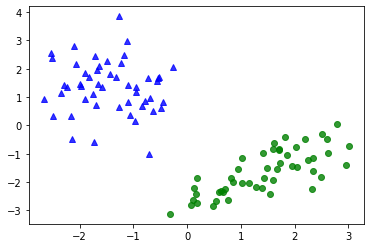

In [ ]:
X0 = X[y == 0,:]
X1 = X[y == 1,:]
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)

In [ ]:
y=np.where(y==0,-1,1)
y = y.reshape(1,100)

Cách 1: Bài toán đối ngẫu 

In [ ]:
V = (X*y.T)
V.shape

(100, 2)

In [ ]:
K = cvxopt.matrix(V.dot(V.T))

In [ ]:
p = cvxopt.matrix(-np.ones((100,1)))

In [ ]:
G = cvxopt.matrix(-np.eye(100))


In [ ]:
h = cvxopt.matrix(np.zeros((100,1)))

In [ ]:
y = y.astype(float)
A = cvxopt.matrix(y)

In [ ]:
b = cvxopt.matrix(np.zeros((1,1)))

In [ ]:
sol = cvxopt.solvers.qp(K,p,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0: -8.9118e+00 -1.8265e+01  3e+02  2e+01  2e+00
 1: -1.0938e+01 -9.6196e+00  1e+02  6e+00  8e-01
 2: -5.8908e+00 -2.4807e+00  2e+01  9e-01  1e-01
 3: -6.9146e-01 -1.5743e+00  2e+00  2e-02  3e-03
 4: -1.0704e+00 -1.3064e+00  3e-01  5e-03  6e-04
 5: -1.2693e+00 -1.2871e+00  2e-02  1e-04  2e-05
 6: -1.2857e+00 -1.2861e+00  4e-04  1e-06  2e-07
 7: -1.2861e+00 -1.2861e+00  4e-06  1e-08  2e-09
 8: -1.2861e+00 -1.2861e+00  4e-08  1e-10  2e-11
Optimal solution found.


In [ ]:
l = np.array(sol['x'])
esp = 1e-6
S = np.where(l > esp)[0]
vs = V.T[:,S]
xs = X.T[:,S]
ys = y[:,S]
ls = l[S]
w = vs.dot(ls)
b = np.mean(ys.T - w.T.dot(xs))

w =  [[ 1.16255113 -1.10482649]]  b =  -1.290599563321646


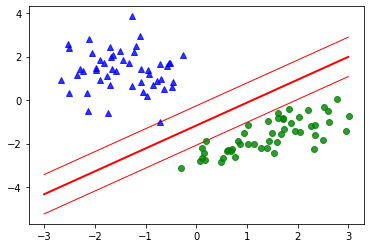

In [ ]:
print("w = ",w.T," b = ", b)
x11 = np.linspace(-3,3,3)
plt.plot(x11,(-w[0]*x11-(b))/w[1],color='red',linewidth =2, label = 'Predict')
plt.plot(x11,(-w[0]*x11-(b-1))/w[1],color='red',linewidth =1, label = 'Predict')
plt.plot(x11,(-w[0]*x11-(b+1))/w[1],color='red',linewidth =1, label = 'Predict')
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)

Cách 2: Gradient Descent

In [ ]:
class svm:
  def __init__(self,lr = 0.001,lambda_ = 0.01,n_iters= 1000 ):
    self.lr = lr
    self.lambda_ = lambda_
    self.n_iters = n_iters
    self.w = None
    self.b = None
  def fit(self,X,y):
    #y_ = np.where(y<=0,-1,1)
    n_samples , n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0 
    for _ in range(self.n_iters):
      for i,j in enumerate(X):
        condition = (y[i] * (np.dot(j,self.w) - self.b)) >=1
        if condition.all():
          self.w -= self.lr *(self.lambda_ * self.w)
        else:
          self.w -= self.lr * (2*self.lambda_*self.w -np.dot(j.reshape(2,1),y[i].reshape(1,100)))
          self.b -= self.lr * y[i]
  def predict(self,X):
    linear_output = np.dot(X,self.w) - self.b
    return np.sign(linear_output)


In [ ]:
svm_model = svm()
svm_model.

SyntaxError: ignored

In [ ]:
svm_model.fit(X,y)

##Soft SVM

In [ ]:
data = datasets.load_iris()

In [ ]:
X = data["data"][:,(2,3)]
y = (data["target"] == 2).astype(int)

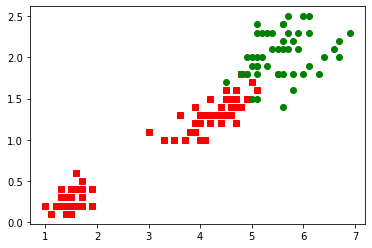

In [ ]:
X0 = X[ y==0,:]
X1 = X[y==1,:]
plt.plot(X0[:,0],X0[:,1],'rs')
plt.plot(X1[:,0],X1[:,1],'go')


In [ ]:
soft_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C =1 , loss="hinge")),
])
soft_svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

Text(0.5, 1.0, 'Decision Boundary')

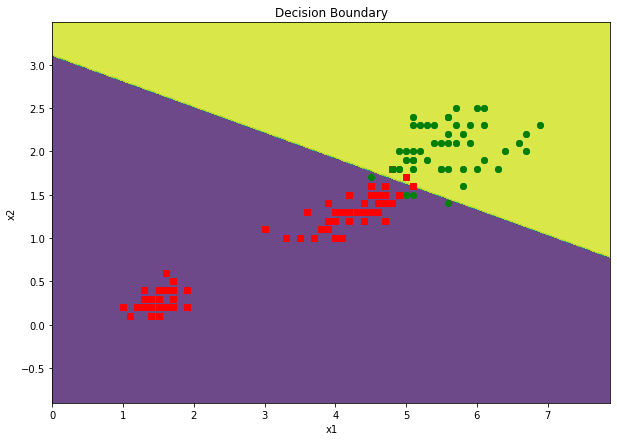

In [ ]:
arr1 = np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01)
arr2 = np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01)
xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = soft_svm.predict(input_array)
plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = .8)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(X0[:,0],X0[:,1],'rs')
plt.plot(X1[:,0],X1[:,1],'go')
plt.title('Decision Boundary')


## Kernel SVM

In [1]:
X,y = datasets.make_moons()

NameError: ignored

In [ ]:
print(X.shape,y.shape)

(100, 2) (100,)


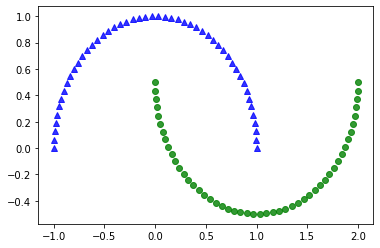

In [ ]:
X0 = X[y == 0,:]
X1 = X[y == 1,:]
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)

In [ ]:
arr1 = np.arange(X[:, 0].min()-1, X[:, 0].max()+1, 0.01)
arr2 = np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01)
xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
for i in [3,5,10]:
  poly_kernel = Pipeline([
    ("poly_features", PolynomialFeatures(degree = i)),
    ("scaler",StandardScaler()),
    ("svm",SVC(kernel ="poly",degree = 3,coef0 = 1, C= 3))
  ])
  poly_kernel.fit(X,y)
  labels = poly_kernel.predict(input_array) 
  plt.figure(figsize =(10, 7))
  plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = .4)
  plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
  plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)



NameError: ignored

Gaussian RBF Kernel

In [ ]:
rbf_kernel = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf"))
])
rbf_kernel.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC())])

Text(0.5, 1.0, 'Decision Boundary')

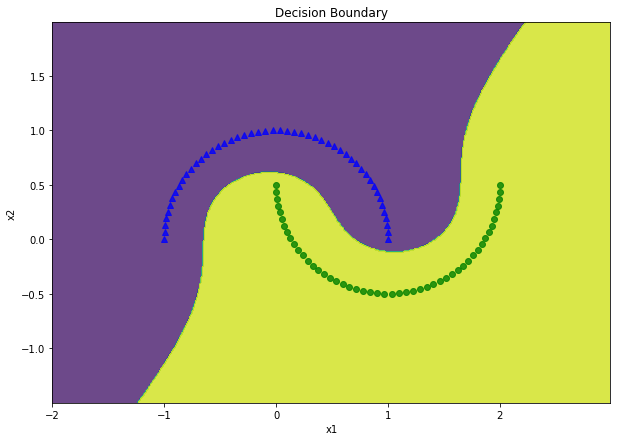

In [ ]:
labels = rbf_kernel.predict(input_array)
plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = .8)
plt.plot(X0[:,0],X0[:,1],'^b',markersize = 6 , alpha =.8)
plt.plot(X1[:,0],X1[:,1],'go',markersize = 6 , alpha =.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')